## Machine Learning Excersice

## Due to the sudden prepone in the deadline of this excercise - I was able to only submit the code in which I have run the ARIMA model to attain time-series forecasting successfully. I could not make a website, however I intended to use pywebio and heroku to make one. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import datetime


## Understanding data better

In [10]:
def parser(x):
    return datetime.strptime(x, "%Y-%m-%d")

series = pd.read_csv('data_daily.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

# Date
2021-01-01    7564766
2021-01-02    7455524
2021-01-03    7095414
2021-01-04    7666163
2021-01-05    7771289
Name: Receipt_Count, dtype: int64


## We plot the data to estimate the parameters of p,d,q 
### p: The number of lag observations included in the model, also called the lag order.
### d: The number of times that the raw observations are differenced, also called the degree of differencing.
### q: The size of the moving average window, also called the order of moving average.

series.plot()
pyplot.show()

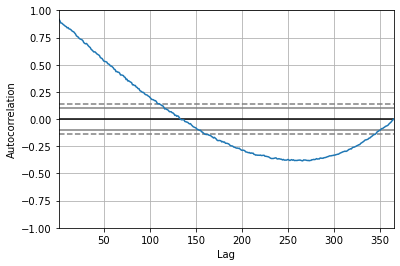

In [12]:
from pandas.plotting import autocorrelation_plot
def parser(x):
    return datetime.strptime(x, "%Y-%m-%d")

series = pd.read_csv('data_daily.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

## Fitting the model

<ipython-input-14-6e2b2329ddc3>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:          Receipt_Count   No. Observations:                  365
Model:                ARIMA(50, 1, 0)   Log Likelihood               -5089.705
Date:                Sun, 05 Feb 2023   AIC                          10281.411
Time:                        23:08:40   BIC                          10480.165
Sample:                    01-31-2021   HQIC                         10360.407
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1956      0.011    -18.364      0.000      -0.216      -0.175
ar.L2         -0.0861      0.021     -4.079      0.000      -0.127      -0.045
ar.L3          0.0109      0.016      0.668      0.5

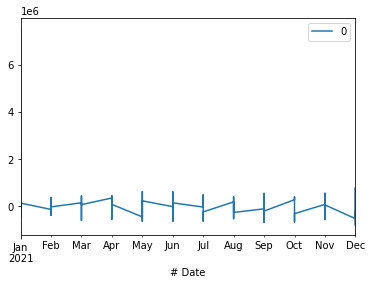

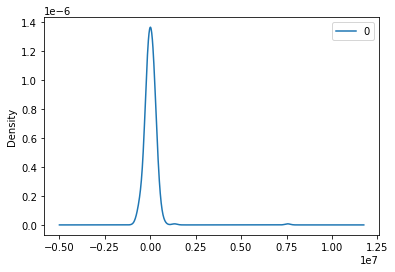

                  0
count  3.650000e+02
mean   3.300057e+04
std    4.762253e+05
min   -8.009711e+05
25%   -1.515245e+05
50%    1.204174e+04
75%    1.795623e+05
max    7.564766e+06


In [14]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime(x, "%Y-%m-%d")
series = pd.read_csv('data_daily.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(50,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

## Prediction

<ipython-input-16-49720af7cde4>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=9174253.823846, expected=9384023.000000
predicted=9386034.561189, expected=9474742.000000
predicted=9490095.786174, expected=9189054.000000
predicted=9246826.480417, expected=9167277.000000
predicted=9138363.758880, expected=9123056.000000
predicted=9169213.225689, expected=9251321.000000
predicted=9101554.061412, expected=9377700.000000
predicted=9431155.272843, expected=9782022.000000
predicted=9612611.510297, expected=8930331.000000
predicted=9203816.603043, expected=9718666.000000
predicted=9578405.016275, expected=9262001.000000
predicted=9427268.742129, expected=9095889.000000
predicted=9011544.247005, expected=9364629.000000
predicted=9410066.855153, expected=9508131.000000
predicted=9314754.259035, expected=9264013.000000
predicted=9345686.040228, expected=9461281.000000
predicted=9563507.136419, expected=9032235.000000
predicted=8923980.028910, expected=9574777.000000
predicted=9676750.930588, expected=9189740.000000
predicted=9142116.095450, expected=9508023.000000


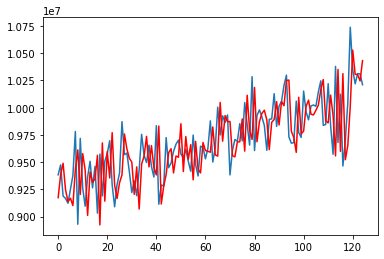

In [16]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime(x, "%Y-%m-%d")
series = pd.read_csv('data_daily.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(50,1,0)) # understand further how to use the param values
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()